In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import tensorflow as tf
import keras as ks
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 
  
# metadata 
print(regensburg_pediatric_appendicitis.metadata) 
  
# variable information 
print(regensburg_pediatric_appendicitis.variables) 

{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [4]:
X.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,+,no,0.0,no,normal,no,yes,no,yes,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,5.26,15.7,12.7,151.0,no,no,no,3.0,yes,normal,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,3.98,11.4,12.2,300.0,no,no,no,3.0,no,constipation,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,4.64,13.6,13.2,258.0,no,no,no,0.0,yes,normal,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,no,no,0.0,no,constipation,no,yes,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [5]:
y.head()

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis


In [6]:
# X.isnull().sum()

In [7]:
# X.head()

In [8]:
# X.sample(10).isnull()

In [9]:
# X.isnull().any()

In [12]:
# X.isna().sum()

In [13]:
X.isnull().values.sum()

13980

In [14]:
X.groupby(['Sex'])['Alvarado_Score'].apply(lambda x: x.isnull().sum())

Sex
female    30
male      21
Name: Alvarado_Score, dtype: int64

<Axes: >

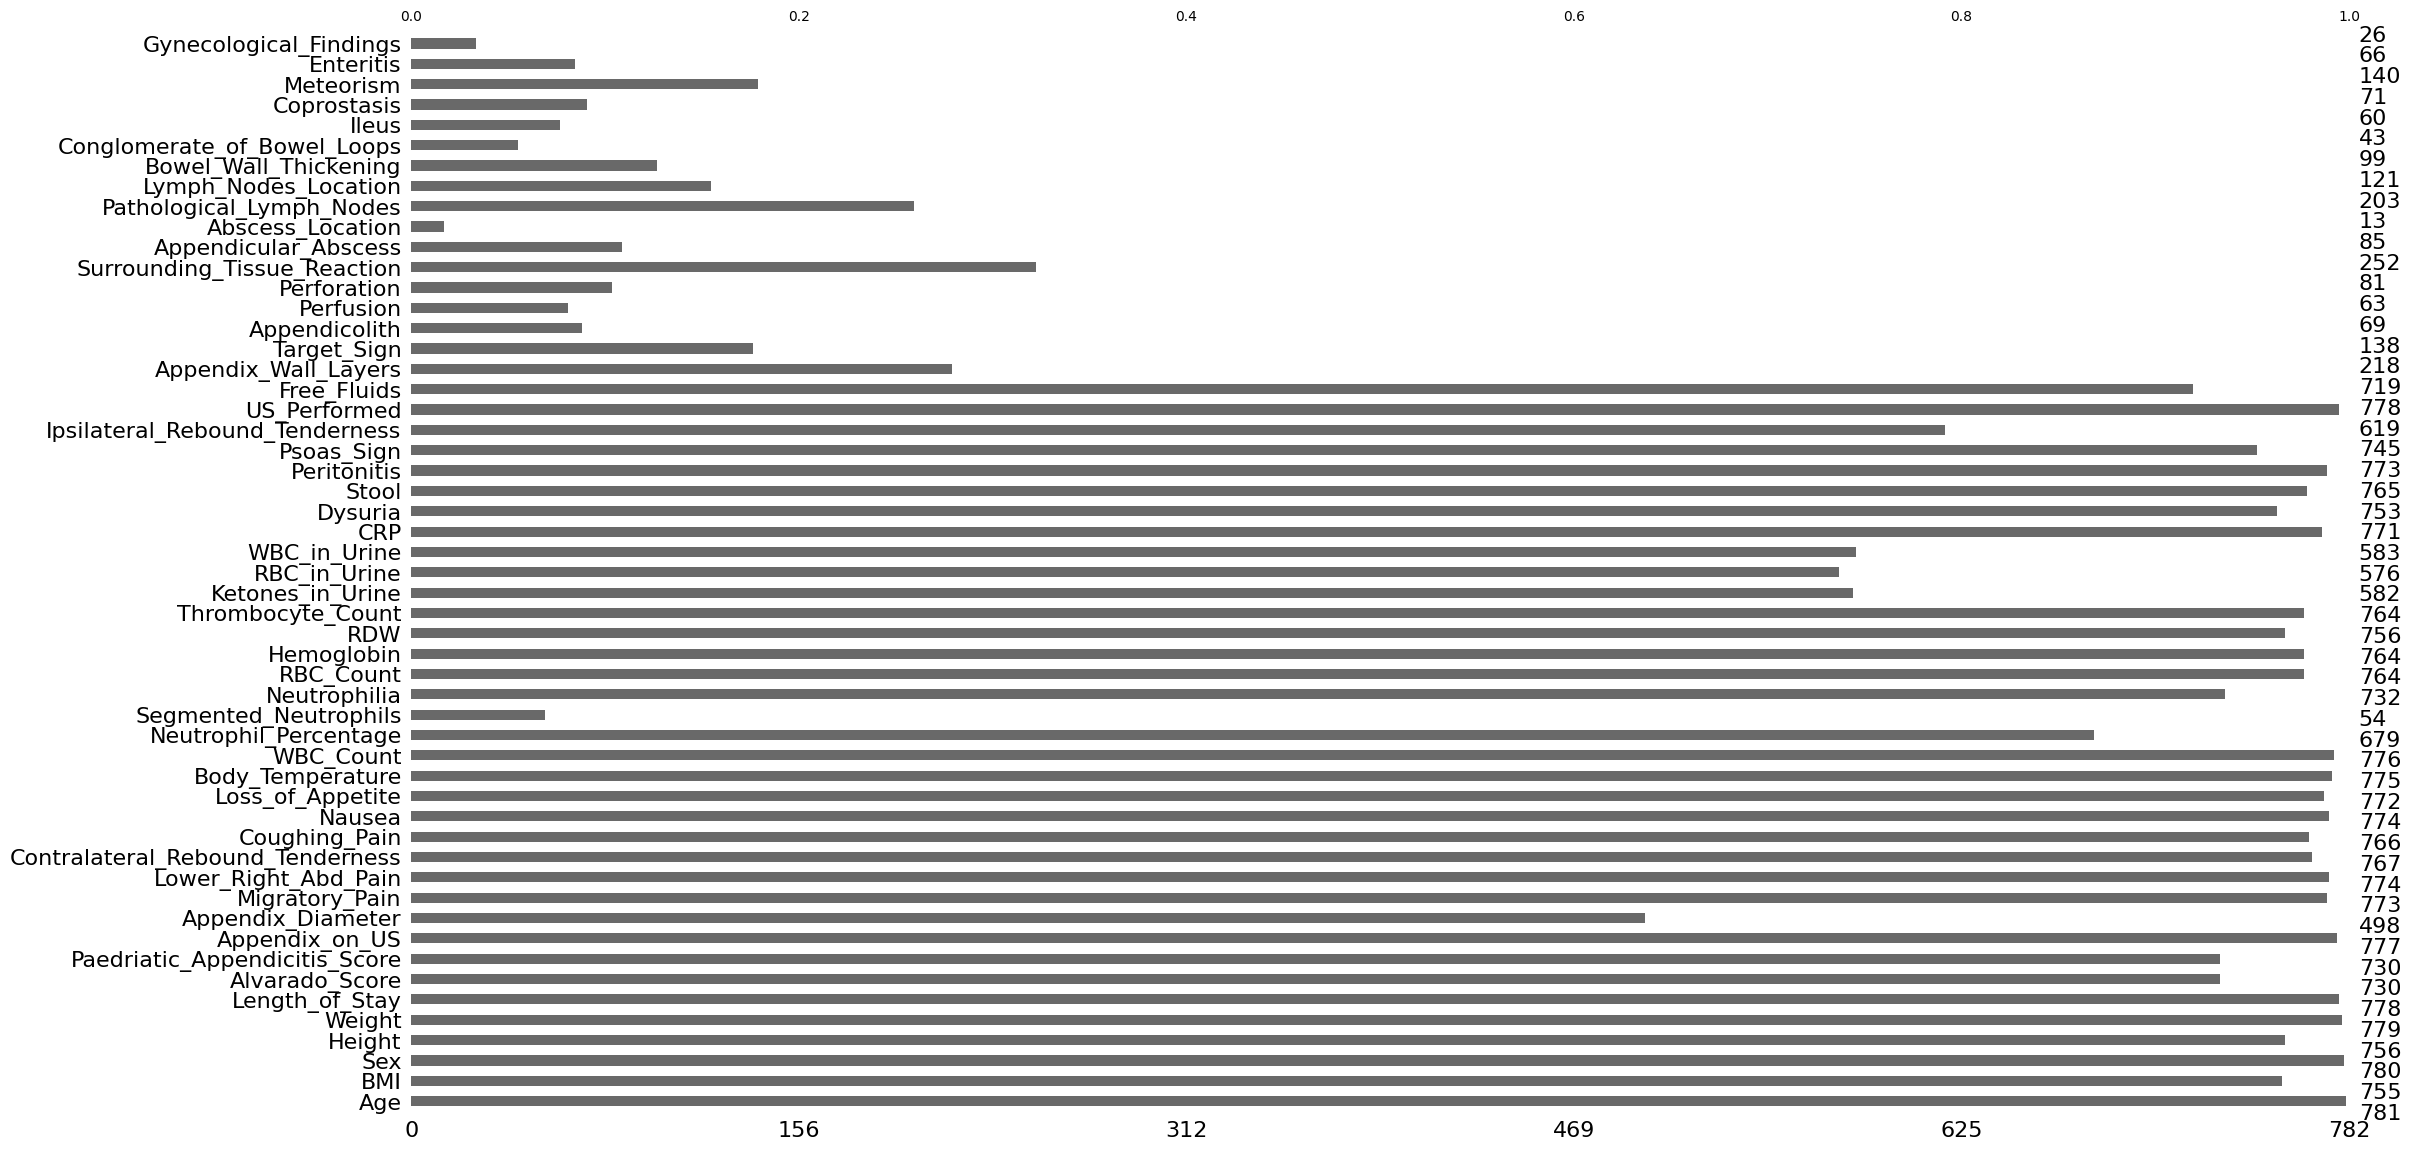

In [15]:
msno.bar(X)